# 过拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0,3.0,size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size = 100)

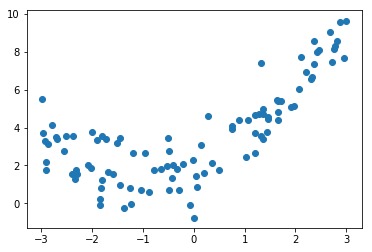

In [3]:
plt.scatter(x,y)
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression  #### 使用线性回归来试试
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
def PolynomialRegression(degree): ##对管道进行了一个包装
    return Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", lin_reg)
                    ])

In [37]:
ploy100_reg = PolynomialRegression(degree=100)
ploy100_reg.fit(X,y)

y100_predict = ploy100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.37911028864397361

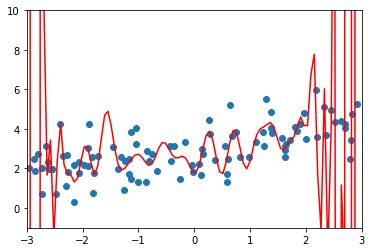

In [38]:
x_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = ploy100_reg.predict(x_plot)

plt.scatter(x,y)
plt.plot(x_plot[:,0],y_plot,color='r')
plt.axis([-3,3,-1,10])
plt.show()

In [39]:
lin_reg.coef_

array([  1.38631498e+13,  -2.15106462e+00,   1.54685058e+02,
         1.68069060e+03,  -1.68601212e+04,  -1.68272272e+05,
         7.71065348e+05,   7.23090168e+06,  -1.91996395e+07,
        -1.74354635e+08,   2.94974394e+08,   2.67388066e+09,
        -2.99793778e+09,  -2.79560053e+10,   2.09075690e+10,
         2.07406929e+11,  -1.01035048e+11,  -1.11497817e+12,
         3.30269233e+11,   4.36549028e+12,  -6.59199191e+11,
        -1.22918769e+13,   4.49637677e+11,   2.38651162e+13,
         1.37731215e+12,  -2.84080042e+13,  -4.08952684e+12,
         1.19668865e+13,   3.49367120e+12,   1.56683819e+13,
         1.92293575e+12,  -1.72710800e+13,  -3.90710387e+12,
        -1.10171088e+13,  -2.28767400e+12,   1.50569147e+13,
         3.46635766e+12,   1.31064683e+13,   4.25863547e+12,
        -8.28344083e+12,  -1.52193146e+12,  -1.56818308e+13,
        -5.94812656e+12,  -3.53224526e+12,  -1.58040884e+12,
         1.16427452e+13,   2.10692442e+12,   1.42875077e+13,
         6.62703368e+12,

# 岭回归

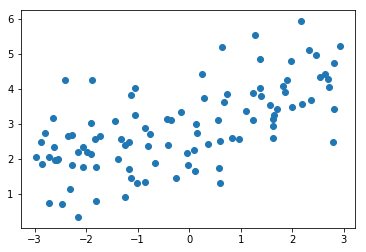

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(42)
x = np.random.uniform(-3.0,3.0,size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0,1,size = 100)

plt.scatter(x,y)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
np.random.seed(666)
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [9]:
ploy20_reg = PolynomialRegression(degree=20)
ploy20_reg.fit(x_train,y_train)

y20_predict = ploy20_reg.predict(x_test)
mean_squared_error(y_test, y20_predict)

167.94010867293571

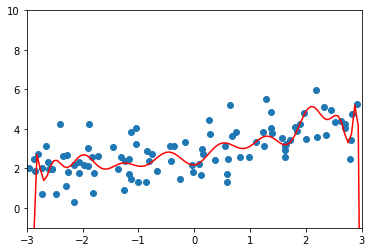

In [10]:
x_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = ploy20_reg.predict(x_plot)

plt.scatter(x,y)
plt.plot(x_plot[:,0],y_plot,color='r')
plt.axis([-3,3,-1,10])
plt.show()

In [11]:
def plot_model(model):
    x_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(x_plot)

    plt.scatter(x,y)
    plt.plot(x_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,-1,10])
    plt.show()

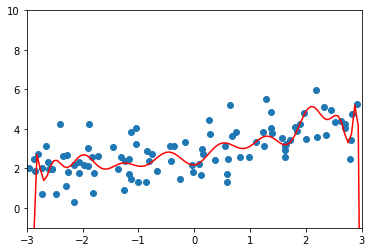

In [12]:
plot_model(ploy20_reg)

# 使用岭回归

In [13]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha): ##对管道进行了一个包装
    return Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("ridge_reg", Ridge(alpha=alpha))
                    ])

In [14]:
ridgel_reg = RidgeRegression(20, 0.0001)
ridgel_reg.fit(x_train, y_train)

y1_predict = ridgel_reg.predict(x_test)
mean_squared_error(y_test, y1_predict)

1.3233492754051845

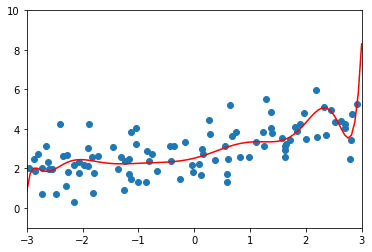

In [15]:
plot_model(ridgel_reg)

In [16]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(x_train, y_train)

y2_predict = ridge2_reg.predict(x_test)
mean_squared_error(y_test, y2_predict)

1.1888759304218448

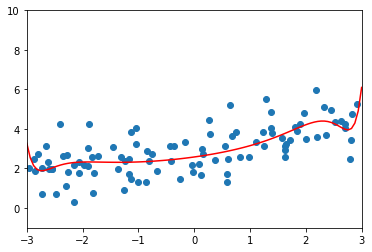

In [17]:
plot_model(ridge2_reg)

In [18]:
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(x_train, y_train)

y3_predict = ridge3_reg.predict(x_test)
mean_squared_error(y_test, y3_predict)

1.3196456113086197

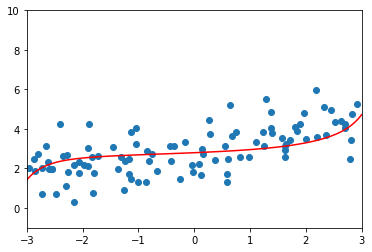

In [19]:
plot_model(ridge3_reg)

# LASSO回归

In [20]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha): ##对管道进行了一个包装
    return Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("lasso_reg", Lasso(alpha=alpha))
                    ])

In [21]:
lasso_reg = LassoRegression(20, 0.01)

In [22]:
lasso_reg.fit(x_train, y_train)

y1_predict = lasso_reg.predict(x_test)
mean_squared_error(y_test, y1_predict)

1.149608084325997

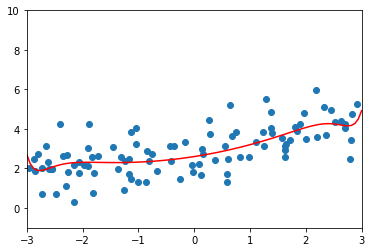

In [23]:
plot_model(lasso_reg)

In [24]:
lasso_reg2 = LassoRegression(20, 0.1)
lasso_reg2.fit(x_train, y_train)

y2_predict = lasso_reg2.predict(x_test)
mean_squared_error(y_test, y2_predict)

1.1213911351818648

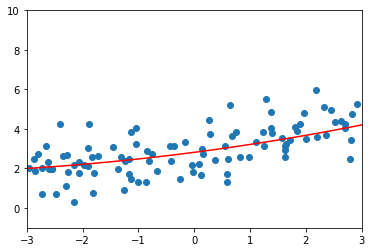

In [25]:
plot_model(lasso_reg2)

In [26]:
lasso_reg3 = LassoRegression(20, 1)
lasso_reg3.fit(x_train, y_train)

y3_predict = lasso_reg3.predict(x_test)
mean_squared_error(y_test, y3_predict)

1.8408939659515595

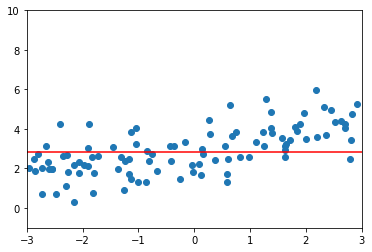

In [27]:
plot_model(lasso_reg3)